In [136]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

folder = '../../Gridsearch_260820'

csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        filename = file.split("_")
        # print(filename[0][-2:].isdigit())
        if filename[0][-2:].isdigit(): df['exp'] = filename[0][-2:]
        else: df['exp'] = filename[0][-1]
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

Total number of Nans: 0


In [137]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [138]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [139]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [140]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [141]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index
count,9725.000000,9725.0,9725.000000,9725.0,9.725000e+03,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000
mean,47.366581,64.0,0.000264,32.0,1.000000e-04,0.260775,0.662314,0.760865,216.916287,0.770878,232.329400,54.442365
std,28.759496,0.0,0.000360,0.0,2.710645e-20,0.364695,0.655251,0.119262,161.205744,0.127875,223.380229,31.743970
min,0.000000,64.0,0.000001,32.0,1.000000e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,64.0,0.000010,32.0,1.000000e-04,0.005000,0.000000,0.766627,132.756912,0.771167,140.186829,27.000000
50%,47.000000,64.0,0.000050,32.0,1.000000e-04,0.050000,1.000000,0.800681,248.588837,0.815905,249.855698,55.000000
75%,72.000000,64.0,0.000500,32.0,1.000000e-04,0.500000,1.000000,0.821715,263.448517,0.840011,262.826599,82.000000
max,99.000000,64.0,0.001000,32.0,1.000000e-04,1.000000,2.000000,0.847656,2519.999512,0.868256,2519.999023,109.000000


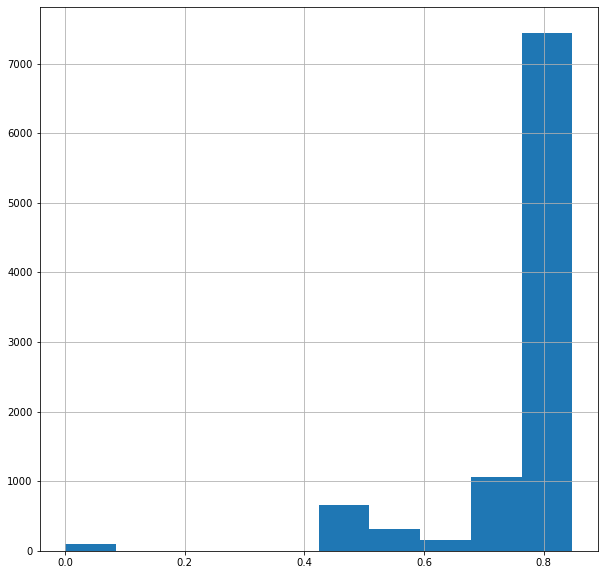

In [142]:
big_df['val_acc'].hist(figsize=(10, 10))

In [143]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'val_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'val_acc'].argmax()].to_dict())

In [144]:
best_df = pd.DataFrame(best_rows)
best_df = best_df.drop(columns= ["learning_rate", "hidden_units", "batch_size", "early_stopping"])

original = best_df[best_df['surprisal_cost'] == 0]
surprisal = best_df[best_df['surprisal_cost'] != 0]

In [145]:
print("No surprisal")
original

No surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index,exp
0,72,0.001000,0.0,0,0.804187,89.769234,0.799613,79.969955,0,0
1,96,0.000050,0.0,1,0.838141,186.439301,0.857038,178.382141,1,0
2,93,0.000005,0.0,0,0.834535,206.321411,0.847690,190.650040,2,0
17,91,0.000100,0.0,0,0.833433,165.116791,0.847089,155.927811,17,14
18,64,0.001000,0.0,1,0.804788,87.910957,0.795072,81.790596,18,14
19,93,0.000005,0.0,1,0.830629,633.157776,0.833734,546.385071,19,14
45,97,0.000500,0.0,1,0.826222,105.633011,0.834802,104.637421,45,21
46,96,0.000001,0.0,1,0.838041,224.421478,0.849359,207.887558,46,21
47,93,0.000050,0.0,0,0.841246,166.170868,0.845820,160.858170,47,21
67,97,0.000100,0.0,1,0.834034,153.582840,0.852831,163.461746,67,28


In [146]:
print("With surprisal")
surprisal

With surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index,exp
3,96,0.000100,0.10,2,0.839543,262.567596,0.855970,261.591949,3,10
4,96,0.000500,0.10,0,0.834235,120.830627,0.840678,123.050148,4,10
5,98,0.000010,0.10,1,0.840545,266.022125,0.861311,264.261414,5,10
6,0,0.000001,0.10,0,0.500401,1407.740845,0.499265,1949.320679,6,10
7,98,0.000100,0.05,2,0.847656,249.025436,0.859509,250.454590,7,11
...,...,...,...,...,...,...,...,...,...,...
105,32,0.000001,1.00,0,0.506510,326.154053,0.491052,326.294800,105,8
106,52,0.000100,0.50,2,0.825120,258.348450,0.830195,258.055542,106,9
107,92,0.000500,0.50,0,0.838341,254.806290,0.855970,254.926208,107,9
108,91,0.000010,0.50,1,0.844351,305.213440,0.858507,299.523560,108,9


In [147]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


Dataframe with all best epochs for Validation accuracy


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index,exp
109,0,0.000001,0.500,0,0.500401,1419.858032,0.499199,2053.598633,109,9
39,0,0.000001,1.000,2,0.500401,1417.187256,0.499933,2425.877197,39,1
49,0,0.000010,1.000,2,0.500300,490.951416,0.491920,1870.902466,49,22
92,0,0.000005,0.050,0,0.500401,2519.999268,0.498064,2519.997314,92,4
6,0,0.000001,0.100,0,0.500401,1407.740845,0.499265,1949.320679,6,10
...,...,...,...,...,...,...,...,...,...,...
60,99,0.000050,0.050,0,0.844752,272.022644,0.864517,272.932037,60,25
44,99,0.000005,0.005,1,0.824619,390.501709,0.824119,398.756134,44,20
36,99,0.000005,0.010,1,0.840745,221.089844,0.855569,221.813766,36,19
14,99,0.000500,0.005,0,0.823818,104.985680,0.828125,99.430222,14,13


In [148]:
print("Dataframe with one per trials")
# mean_df = best_df.groupby(by=["cost_per_sample", "surprisal_cost"])
sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="val_acc")
sorted.first()

Dataframe with one per trials


epoch  trial   val_acc  val_updates  \
cost_per_sample surprisal_cost                                        
0.000001        0.000              96      1  0.838041   224.421478   
                0.005              94      0  0.836839   343.233063   
                0.010              91      0  0.840445   205.022430   
                0.050               2      0  0.500401  1410.807251   
                0.100               0      0  0.500401  1407.740845   
                0.500               2      1  0.500401  1427.055664   
                1.000               0      2  0.500401  1417.187256   
0.000005        0.000              93      0  0.834535   206.321411   
                0.005              99      1  0.824619   390.501709   
                0.010              99      1  0.840745   221.089844   
                0.050              91      1  0.840345   269.713928   
                0.100              94      1  0.836538   330.462433   
                0.500              94      1  0.843450   262.025146   
                1.000              12      1  0.508013   329.784058   
0.000010        0.000              99      0  0.835837   190.328827   
                0.005              97      1  0.840144   186.748093   
                0.010              88      1  0.835737   272.230682   
                0.050              98      1  0.843950   277.367798   
                0.100              98      1  0.840545   266.022125   
                0.500              91      0  0.836939   269.732178   
                1.000               0      2  0.500300   490.951416   
0.000050        0.000              96      1  0.838141   186.439301   
                0.005              97      0  0.836238   170.484772   
                0.010              95      0  0.841747   207.377899   
                0.050              99      0  0.844752   272.022644   
                0.100              82      0  0.840946   269.041260   
                0.500               2      2  0.503606   305.711334   
                1.000              98      2  0.840545   263.244690   
0.000100        0.000              91      0  0.833433   165.116791   
                0.005              80      0  0.839944   157.257004   
                0.010              57      0  0.821214   162.461533   
                0.050              98      2  0.847656   249.025436   
                0.100              96      2  0.839543   262.567596   
                0.500              89      0  0.839844   261.984863   
                1.000              96      0  0.839243   262.076416   
0.000500        0.000              97      1  0.826222   105.633011   
                0.005              99      0  0.823818   104.985680   
                0.010              86      0  0.823618   100.933792   
                0.050              90      0  0.829928   127.139824   
                0.100              96      0  0.834235   120.830627   
                0.500              96      1  0.839243   254.629913   
                1.000              94      2  0.841246   248.574417   
0.001000        0.000              72      0  0.804187    89.769234   
                0.005              93      1  0.807192    81.246193   
                0.010              87      1  0.808894    85.298981   
                0.050              75      1  0.806490    86.426285   
                0.100              91      1  0.815204    96.762619   
                0.500              99      1  0.841947   251.803986   
                1.000              89      1  0.843149   253.769638   

                                train_acc  train_updates  list_index exp  
cost_per_sample surprisal_cost                                            
0.000001        0.000            0.849359     207.887558          46  21  
                0.005            0.840011     314.451324          16  13  
                0.010            0.856838     199.037186          13  12  
                0.050            0.

In [149]:
# mean_df = mean_df.max()
# mean_df.sort_values(by='val_acc')
print("Clearer visualization")
# , axis=1, names=["acc_mean", "acc_std", "updates_mean", "updates_std"])
view = pd.DataFrame({'count': sorted.val_acc.count(),
                     'acc_mean': sorted.val_acc.mean(),
                     'acc_std': sorted.val_acc.std(),
                     'updates_mean': sorted.val_updates.mean(),
                     'updates_std': sorted.val_updates.std(),
                     'epoch_mean': sorted.epoch.mean()})
# view.rename(columns=["acc_mean", "acc_std", "updates_mean", "updates_std"])
view[view['acc_mean'] > 0.835]

Clearer visualization


count  acc_mean   acc_std  updates_mean  \
cost_per_sample surprisal_cost                                            
0.000005        0.010               2  0.841346  0.000850    223.308693   
                0.100               2  0.838942  0.003400    303.365585   
                0.500               2  0.841997  0.002054    267.434143   
0.000010        0.000               2  0.837240  0.001983    200.917168   
                0.005               2  0.841947  0.002550    207.625946   
                0.010               2  0.839243  0.004958    262.400848   
                0.050               2  0.841697  0.003187    269.481873   
                0.100               2  0.838742  0.002550    263.560699   
                0.500               2  0.840645  0.005241    287.472809   
0.000050        0.000               2  0.839694  0.002196    176.305084   
                0.005               2  0.837740  0.002125    171.869186   
                0.010               2  0.839493  0.003187    207.012421   
                0.100               2  0.843099  0.003045    267.032501   
0.000100        0.005               2  0.839894  0.000071    155.518929   
                0.050               3  0.840645  0.006459    223.080393   
                0.500               3  0.837206  0.011007    261.212331   
                1.000               3  0.839844  0.003445    262.832062   
0.000500        0.500               2  0.838792  0.000637    254.718102   
0.001000        0.500               3  0.840912  0.002802    249.604101   
                1.000               3  0.842548  0.000722    252.851262   

                                updates_std  epoch_mean  
cost_per_sample surprisal_cost                           
0.000005        0.010              3.137927   92.500000  
                0.100             38.320729   95.000000  
                0.500              7.649476   92.000000  
0.000010        0.000             14.974175   97.500000  
                0.005             29.525743   97.000000  
                0.010             13.901485   91.000000  
                0.050             11.152383   97.000000  
                0.100              3.480982   93.000000  
                0.500             25.089041   91.000000  
0.000050        0.000             14.331946   94.500000  
                0.005              1.957858   96.500000  
                0.010              0.516865   92.000000  
                0.100              2.840814   88.500000  
0.000100        0.005              2.458010   88.000000  
                0.050             27.264081   86.333333  
                0.500              2.566356   77.000000  
                1.000              2.339528   93.333333  
0.000500        0.500              0.124717   94.000000  
0.001000        0.500              2.575255   92.333333  
                1.000              1.746450   92.000000

In [150]:
lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

In [151]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    df.loc[['val_updates', 'train_updates']] = df['val_updates', 'train_updates']/2520
    ax = df[['val_acc', 'train_acc', 'val_updates', 'train_updates']].plot()
    ax.set_ylim(0.4, 1)
    ax.get_figure().savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_cps{csvs[i].cost_per_sample[0]}_s{csvs[i].surprisal_cost[0]}_exp{csvs[i].exp[0]}.png")
    plt.clf()

KeyError: ('val_updates', 'train_updates')

In [ ]:
# if not os.path.exists(f"{folder}/lrplots"):
#     os.makedirs(f"{folder}/lrplots")
#
# for i, df in enumerate(lr0001):
#     df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")
#

In [ ]:
best_hyper = pd.concat(lr0001)

best_hyper_diff = best_hyper['val_acc'].diff(15)
best_hyper_diff.abs().mean()


In [ ]:
csvs[11]

best_df.sort_values(by='val_acc')